<a href="https://colab.research.google.com/github/ThatOneGuyy208/CS167Repo/blob/main/Notebook6_Jaired.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name: Jaired

Date: 04/18/2023

## Problem Description: Algorithmically analyzing chest x-rays to predict if patient has pneumonia



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [ ]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167_datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS167_datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [1]:
# Build your CNN here

#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
# Conv layer 1
# Pool layer 1
# Conv layer 2
# Pool layer 2
# Flatten
# Fully Connected (Dense)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(64)) #fully-connected layer
model.add(Dense(6,activation='softmax'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

<ipython-input-3-239ff2b97032>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


Epoch 1/10
163/163 [==============================] - 930s 5s/step - loss: 0.3328 - accuracy: 0.8600 - val_loss: 0.7930 - val_accuracy: 0.6811
Epoch 2/10
163/163 [==============================] - 17s 102ms/step - loss: 0.1581 - accuracy: 0.9408 - val_loss: 0.5406 - val_accuracy: 0.7772
Epoch 3/10
163/163 [==============================] - 17s 104ms/step - loss: 0.1364 - accuracy: 0.9480 - val_loss: 0.4722 - val_accuracy: 0.8045
Epoch 4/10
163/163 [==============================] - 17s 105ms/step - loss: 0.1353 - accuracy: 0.9473 - val_loss: 0.7417 - val_accuracy: 0.7452
Epoch 5/10
163/163 [==============================] - 17s 104ms/step - loss: 0.1148 - accuracy: 0.9571 - val_loss: 0.7961 - val_accuracy: 0.7484
Epoch 6/10
163/163 [==============================] - 17s 105ms/step - loss: 0.1112 - accuracy: 0.9563 - val_loss: 0.7057 - val_accuracy: 0.7772
Epoch 7/10
163/163 [==============================] - 17s 102ms/step - loss: 0.1210 - accuracy: 0.9546 - val_loss: 0.8849 - val_accu

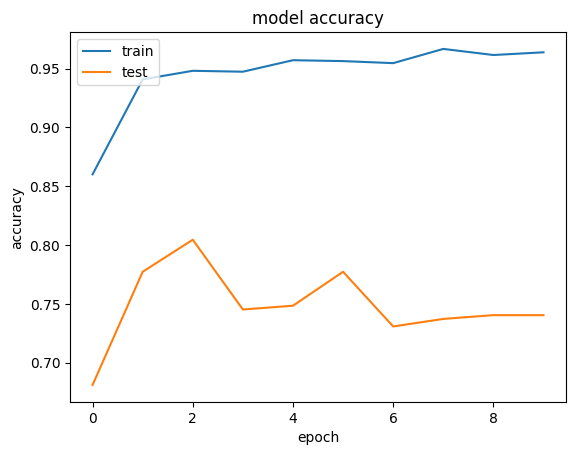

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Build tuned CNN here

#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model2.add(Dense(1024,activation = 'relu')) #fully-connected layer
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


ran 32 min

In [ ]:
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

<ipython-input-4-19587c1a0453>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results2 = model2.fit_generator(


Epoch 1/20
163/163 [==============================] - 1587s 9s/step - loss: 0.5983 - accuracy: 0.7280 - val_loss: 0.6925 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 16s 96ms/step - loss: 0.5668 - accuracy: 0.7429 - val_loss: 0.6956 - val_accuracy: 0.6250
Epoch 3/20
163/163 [==============================] - 16s 97ms/step - loss: 0.5379 - accuracy: 0.7429 - val_loss: 0.5954 - val_accuracy: 0.6250
Epoch 4/20
163/163 [==============================] - 16s 97ms/step - loss: 0.3685 - accuracy: 0.8276 - val_loss: 0.3164 - val_accuracy: 0.8654
Epoch 5/20
163/163 [==============================] - 16s 97ms/step - loss: 0.2180 - accuracy: 0.9114 - val_loss: 0.5643 - val_accuracy: 0.7660
Epoch 6/20
163/163 [==============================] - 16s 98ms/step - loss: 0.1727 - accuracy: 0.9333 - val_loss: 0.7797 - val_accuracy: 0.7324
Epoch 7/20
163/163 [==============================] - 16s 96ms/step - loss: 0.1376 - accuracy: 0.9457 - val_loss: 1.0206 - val_accuracy:

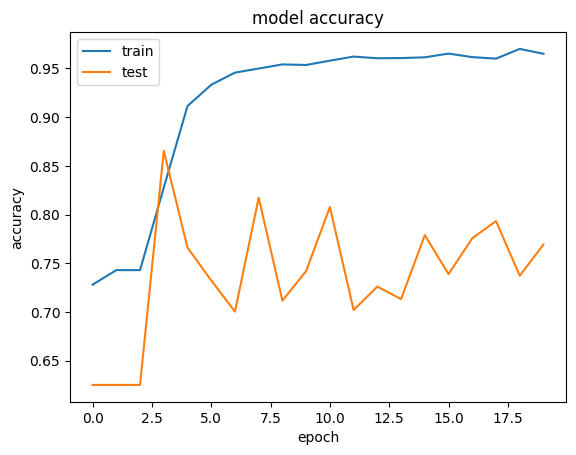

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(max(training_results2.history['val_accuracy']))

0.8653846383094788


What configuration of your CNN proved to be more accurate? Why do you think this is the case?

The tuned version I made. While the untuned model appears to be getting more inacurate due to overfitting, my tuned version appears to swing between highs and lows. But with more epoch's its swingd become less and less, likely leading to it rounding out between 0.8 and .75, maybe even rising above that. I believe this to be the case because it has more layers to work with.

How accurate can you make your CNN predictor? I will award a bonus point to the student who can achieve the most accurate model.

0.865